In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

# Se importan paquetes de análisis de datos- Proceso

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

# Se importa base de plan de ventas fusión Agro 

BaseVentasFusionAgro = pd.read_csv("11.csv")

# Se importan categorías de producto, cultivo y cliente

Zona = pd.read_csv("Zona.csv")

Producto = pd.read_csv("Producto.csv")

Cultivo = pd.read_csv("Cultivo.csv")

Mesatrimestre = pd.read_csv("Mesatrimestre.csv")

# Se incluyen las categorías en la base

Ventas_zona = BaseVentasFusionAgro.merge(Zona, how='left', left_on='RM/ REIQ', right_on='RM/ REIQ_')

Ventas_zona_producto = Ventas_zona.merge(Producto, how='left', left_on='Producto_', right_on='Producto_')

Ventas_zona_producto_ = Ventas_zona_producto.merge(Mesatrimestre, how='left', left_on='Mes', right_on='Mes')

Ventas_zona_producto_cultivo_ = Ventas_zona_producto_.merge(Cultivo, how='left', left_on='Cultivo_', right_on='Cultivo', indicator = True)



Toggle code

In [2]:
#Criterios para filtrar datos

Periodoconsiderado_2022 = Ventas_zona_producto_cultivo_['Periodo'] == 2022
Periodoconsiderado2021 = Ventas_zona_producto_cultivo_['Periodo'] == 2021
EmpresaconsideradaMéxico = Ventas_zona_producto_cultivo_ ['Empresa'] == "México"
EmpresaconsideradaNOesMéxico = Ventas_zona_producto_cultivo_ ['Empresa'] != "México"
AdmCat_Cito = Ventas_zona_producto_cultivo_['Administracion de la categoria'] == "1 Cito"
AdmCat_Suelo = Ventas_zona_producto_cultivo_['Administracion de la categoria'] == "2 Raiz/ suelo"
AdmCat_Bioest = Ventas_zona_producto_cultivo_['Administracion de la categoria'] == "3 Bioestimulante"
AdmCat_Coady = Ventas_zona_producto_cultivo_['Administracion de la categoria'] == "4 Coadyuvante"
H2 = Ventas_zona_producto_cultivo_['H1 o H2 o Resto'] == "H2"

# También es posible filtrar por zona p.ej.: ['Zona_Ranking'] == '02 Pacífico'
# En lugar de Pacífico las otras zonas son:
# '01 Norte', '08 Ecu,Col,EUA', '05 Zona 2','06 IqChem', '07 Zona 1', '03 Sureste', '04 Chile/Perú'
# Las otras empresas: 
# 'Intnl', 'CAC', 'IqChem', 'SUD'



In [3]:
# Plan 2022 corresponde al año 2022, también es posible seleccionar 2020 o 2021

Ventas_zona_producto_cultivo = Ventas_zona_producto_cultivo_

#Columnas auxiliares

Ventas_zona_producto_cultivo['Utilidad $M'] = Ventas_zona_producto_cultivo['Utilidad']/1000000

Ventas_zona_producto_cultivo['Utilidad/Utilidad_total (%)'] = Ventas_zona_producto_cultivo['Utilidad']*100/(Ventas_zona_producto_cultivo['Utilidad'].sum())

# La base de ventas fusión agro, se filtra por año y/o empresa y/o categoría
# Se usa la base que incluye categorías de cultivos, clientes y productos
# Se usan los criterios para filtrar datos listados previamente

Ventas_zona_producto_cultivo_Mx_2022 = Ventas_zona_producto_cultivo_[
    EmpresaconsideradaMéxico &
    Periodoconsiderado_2022]

Ventas_zona_producto_cultivo_noesMx_2022 = Ventas_zona_producto_cultivo_[
    EmpresaconsideradaNOesMéxico &
    Periodoconsiderado_2022]

Ventas_zona_producto_cultivo_2021 = Ventas_zona_producto_cultivo_[
    Periodoconsiderado2021]

Ventas_zona_producto_cultivo_2022 = Ventas_zona_producto_cultivo_[
    Periodoconsiderado_2022]

Ventas_zona_producto_cultivo_Cito_2022 = Ventas_zona_producto_cultivo_[
    Periodoconsiderado_2022  &
    AdmCat_Cito]
Ventas_zona_producto_cultivo_Suelo_2022 = Ventas_zona_producto_cultivo_[
    Periodoconsiderado_2022 &
    AdmCat_Suelo]
Ventas_zona_producto_cultivo_Bioest_2022 = Ventas_zona_producto_cultivo_[
    Periodoconsiderado_2022 &
    AdmCat_Bioest]
Ventas_zona_producto_cultivo_Coady_2022 = Ventas_zona_producto_cultivo_[
    Periodoconsiderado_2022 &
    AdmCat_Coady]

# Análisis del primer trimestre de Base de ventas Fusión Agro

# Utilidad ($M) Fusión Agro por zona y por año 

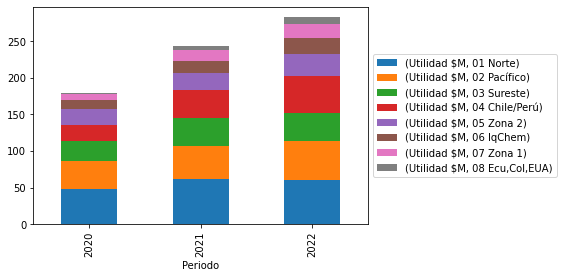

In [4]:
UZA = Ventas_zona_producto_cultivo.groupby(['Periodo','Zona_Ranking']).agg({'Utilidad $M': 'sum'}).reset_index()
UZA_ = Ventas_zona_producto_cultivo.groupby(['Periodo','Zona_Ranking']).agg({'Utilidad $M': 'sum'})
UZA_df = pd.DataFrame(UZA_.unstack(level = 1))
UZA_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [5]:
UZA2 = Ventas_zona_producto_cultivo.groupby(['Periodo']).agg({'Utilidad $M': 'sum'})
UZA2.style.format('${0:,.2f}').bar(color='lightgreen', vmin=0, subset=['Utilidad $M'])

,Utilidad $M
Periodo,
2020,$179.34
2021,$243.77
2022,$282.75


# Utilidad ($M) Fusión Agro 

In [6]:
print ('${:,.3f} M'.format(Ventas_zona_producto_cultivo_2022['Utilidad'].sum()/1000000) )

$282.747 M


# Crecimiento respecto al 2021

In [7]:
print ('{:,.2f} %'.format(
                            ((Ventas_zona_producto_cultivo_2022['Utilidad'].sum()/
                            Ventas_zona_producto_cultivo_2021['Utilidad'].sum())-1)*100
                        )) 

15.99 %


 # Desglose por zona y por categoría

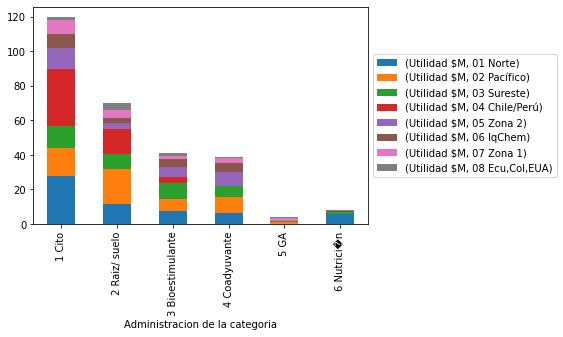

In [8]:
RCZ = Ventas_zona_producto_cultivo_2022.groupby(['Administracion de la categoria','Zona_Ranking']).agg({'Utilidad $M': 'sum'}).reset_index()
RCZ_ = Ventas_zona_producto_cultivo_2022.groupby(['Administracion de la categoria','Zona_Ranking']).agg({'Utilidad $M': 'sum'})
RCZ_df = pd.DataFrame(RCZ_.unstack(level = 1))
RCZ_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [9]:
RCZ2 = Ventas_zona_producto_cultivo_2022.groupby(['Administracion de la categoria']).agg({'Utilidad $M': 'sum'})
RCZ2.head(20).style.format('${0:,.2f}').bar(color='lightgreen', vmin=0, subset=['Utilidad $M'])

,Utilidad $M
Administracion de la categoria,
1 Cito,$119.83
2 Raiz/ suelo,$70.25
3 Bioestimulante,$41.33
4 Coadyuvante,$38.83
5 GA,$4.27
6 Nutrici�n,$8.24


# Análisis por categoría

# Cito, 2022

# Valor de Cito y lo que representa respecto a utilidad total

In [10]:
utilidadtotal2022 = Ventas_zona_producto_cultivo_2022['Utilidad'].sum()
utilidadcito2022 = Ventas_zona_producto_cultivo_Cito_2022['Utilidad'].sum()
utilidadcito2022/ utilidadtotal2022
print ('${:,.3f} M'.format(Ventas_zona_producto_cultivo_Cito_2022['Utilidad'].sum()/1000000) )
print ('{:,.1f} %'.format(utilidadcito2022*100/ utilidadtotal2022))


$119.832 M
42.4 %


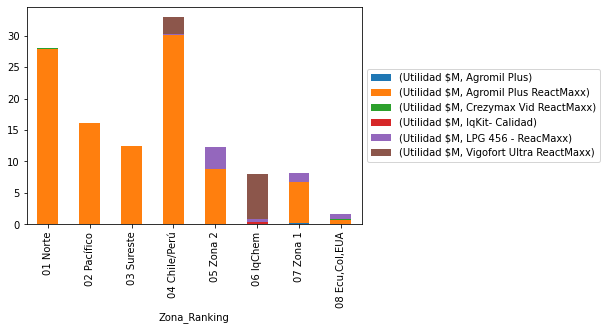

In [11]:
ResumenporHorizonteyEmp = Ventas_zona_producto_cultivo_Cito_2022.groupby(['Zona_Ranking','Producto_']).agg({'Utilidad $M': 'sum'}).reset_index()
ResumenporHorizonteyEmp_ = Ventas_zona_producto_cultivo_Cito_2022.groupby(['Zona_Ranking','Producto_']).agg({'Utilidad $M': 'sum'})
ResumenporHorizonteyEmp_df = pd.DataFrame(ResumenporHorizonteyEmp_.unstack(level = 1))
ResumenporHorizonteyEmp_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [12]:
Ventas_RM_Cito_2022 = Ventas_zona_producto_cultivo_Cito_2022.groupby(['RM/ REIQ_Ranking']).agg({'Utilidad $M': 'sum'})
Ventas_RM_Cito_2022_sorted = Ventas_RM_Cito_2022.sort_values(by=['Utilidad $M'],ascending=False)
Ventas_RM_Cito_2022_sorted.head(10).style.format('${0:,.2f}').bar(color='lightgreen', vmin=0, subset=['Utilidad $M'])

,Utilidad $M
RM/ REIQ_Ranking,
10 Drokasa,$12.85
09 GMT,$12.09
04 Dysea,$9.78
01 Ditecosa,$8.41
03 Quinval,$8.05
02 JF,$7.93
18 Tattersal,$7.71
11 Empresas Melo,$6.83
05 GT,$5.76


# Raíz/ Suelo, 2022

# Valor de RaízSuelo y lo que representa respecto a utilidad total

In [13]:
utilidadtotal2022 = Ventas_zona_producto_cultivo_2022['Utilidad'].sum()
utilidadsuelo2022 = Ventas_zona_producto_cultivo_Suelo_2022['Utilidad'].sum()
print ('${:,.3f} M'.format(Ventas_zona_producto_cultivo_Suelo_2022['Utilidad'].sum()/1000000) )
print ('{:,.1f} %'.format(utilidadsuelo2022*100/ utilidadtotal2022))


$70.248 M
24.8 %


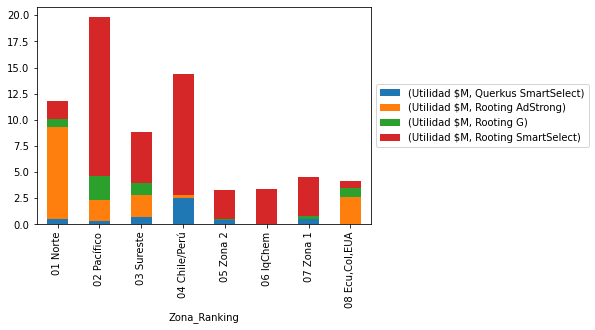

In [14]:
ResumenporHorizonteyEmp_Suelo = Ventas_zona_producto_cultivo_Suelo_2022.groupby(['Zona_Ranking','Producto_']).agg({'Utilidad $M': 'sum'}).reset_index()
ResumenporHorizonteyEmp_Suelo_ = Ventas_zona_producto_cultivo_Suelo_2022.groupby(['Zona_Ranking','Producto_']).agg({'Utilidad $M': 'sum'})
ResumenporHorizonteyEmp_Suelo_df = pd.DataFrame(ResumenporHorizonteyEmp_Suelo_.unstack(level = 1))
ResumenporHorizonteyEmp_Suelo_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [15]:
Ventas_RM_Suelo_2022 = Ventas_zona_producto_cultivo_Suelo_2022.groupby(['RM/ REIQ_Ranking']).agg({'Utilidad $M': 'sum'})
Ventas_RM_Suelo_2022_sorted = Ventas_RM_Suelo_2022.sort_values(by=['Utilidad $M'],ascending=False)
Ventas_RM_Suelo_2022_sorted.head(10).style.format('${0:,.2f}').bar(color='lightgreen', vmin=0, subset=['Utilidad $M'])

,Utilidad $M
RM/ REIQ_Ranking,
06 AACSA,$10.67
02 JF,$7.37
09 GMT,$6.17
10 Drokasa,$5.42
03 Quinval,$4.26
01 Ditecosa,$3.10
14 PromAgric,$2.76
04 Dysea,$2.63
05 GT,$2.63


# Bioestimulante, 2022

# Valor de Bioestimulante y lo que representa respecto a utilidad total

In [16]:
utilidadtotal2022 = Ventas_zona_producto_cultivo_2022['Utilidad'].sum()
utilidadbioest2022 = Ventas_zona_producto_cultivo_Bioest_2022['Utilidad'].sum()
print ('${:,.3f} M'.format(Ventas_zona_producto_cultivo_Bioest_2022['Utilidad'].sum()/1000000) )
print ('{:,.1f} %'.format(utilidadbioest2022*100/ utilidadtotal2022))


$41.328 M
14.6 %


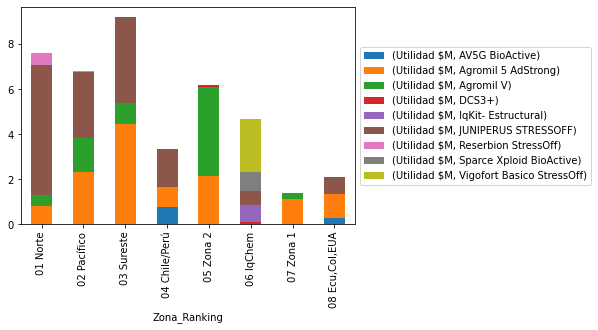

In [17]:
ResumenporHorizonteyEmp_Bioest = Ventas_zona_producto_cultivo_Bioest_2022.groupby(['Zona_Ranking','Producto_']).agg({'Utilidad $M': 'sum'}).reset_index()
ResumenporHorizonteyEmp_Bioest_ = Ventas_zona_producto_cultivo_Bioest_2022.groupby(['Zona_Ranking','Producto_']).agg({'Utilidad $M': 'sum'})
ResumenporHorizonteyEmp_Bioest_df = pd.DataFrame(ResumenporHorizonteyEmp_Bioest_.unstack(level = 1))
ResumenporHorizonteyEmp_Bioest_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [18]:
Ventas_RM_Bioest_2022 = Ventas_zona_producto_cultivo_Bioest_2022.groupby(['RM/ REIQ_Ranking']).agg({'Utilidad $M': 'sum'})
Ventas_RM_Bioest_2022_sorted = Ventas_RM_Bioest_2022.sort_values(by=['Utilidad $M'],ascending=False)
Ventas_RM_Bioest_2022_sorted.head(10).style.format('${0:,.2f}').bar(color='lightgreen', vmin=0, subset=['Utilidad $M'])

,Utilidad $M
RM/ REIQ_Ranking,
07 Fv,$5.25
08 Agrícola Piscis,$4.49
01 Ditecosa,$4.14
15 Ciba,$2.91
12 Propios,$2.56
02 JF,$2.39
16 Txao,$2.13
03 Quinval,$1.62
39 Serco Verde,$1.38


# Coady 2022

# Valor de Coadyuvante y lo que  representa respecto a utilidad total 

In [19]:
utilidadtotal2022 = Ventas_zona_producto_cultivo_2022['Utilidad'].sum()
utilidadcoady2022 = Ventas_zona_producto_cultivo_Coady_2022['Utilidad'].sum()
print ('${:,.3f} M'.format(Ventas_zona_producto_cultivo_Coady_2022['Utilidad'].sum()/1000000) )
print ('{:,.1f} %'.format(utilidadcoady2022*100/ utilidadtotal2022))

$38.833 M
13.7 %


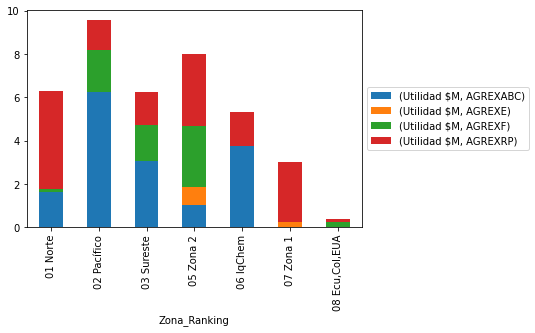

In [20]:
ResumenporHorizonteyEmp_Coady = Ventas_zona_producto_cultivo_Coady_2022.groupby(['Zona_Ranking','Producto_']).agg({'Utilidad $M': 'sum'}).reset_index()
ResumenporHorizonteyEmp_Coady_ = Ventas_zona_producto_cultivo_Coady_2022.groupby(['Zona_Ranking','Producto_']).agg({'Utilidad $M': 'sum'})
ResumenporHorizonteyEmp_Coady_df = pd.DataFrame(ResumenporHorizonteyEmp_Coady_.unstack(level = 1))
ResumenporHorizonteyEmp_Coady_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [21]:
Ventas_zona_Coady_2022 = Ventas_zona_producto_cultivo_Coady_2022.groupby(['RM/ REIQ_Ranking']).agg({'Utilidad $M': 'sum'})
Ventas_zona_Coady_2022_sorted = Ventas_zona_Coady_2022.sort_values(by=['Utilidad $M'],ascending=False)
Ventas_zona_Coady_2022_sorted.head(10).style.format('${0:,.2f}').bar(color='lightgreen', vmin=0, subset=['Utilidad $M'])

,Utilidad $M
RM/ REIQ_Ranking,
02 JF,$6.09
03 Quinval,$5.59
08 Agrícola Piscis,$5.14
12 Propios,$5.04
07 Fv,$3.05
05 GT,$2.68
06 AACSA,$2.53
11 Empresas Melo,$2.21
14 PromAgric,$2.09


# Análisis Mx vs "Internacional"

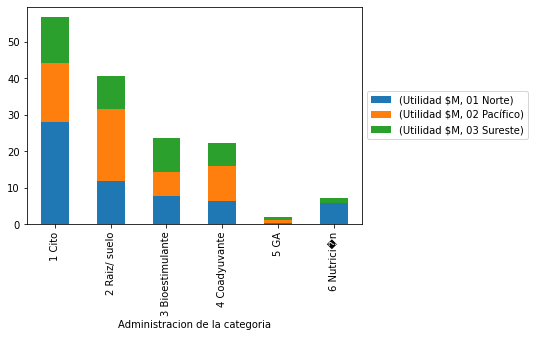

In [22]:
RCZ_Mx = Ventas_zona_producto_cultivo_Mx_2022.groupby(['Administracion de la categoria','Zona_Ranking']).agg({'Utilidad $M': 'sum'}).reset_index()
RCZ_Mx_ = Ventas_zona_producto_cultivo_Mx_2022.groupby(['Administracion de la categoria','Zona_Ranking']).agg({'Utilidad $M': 'sum'})
RCZ_Mx_df = pd.DataFrame(RCZ_Mx_.unstack(level = 1))
RCZ_Mx_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()



In [23]:
print ('${:,.3f} M'.format(RCZ_Mx['Utilidad $M'].sum()) )


$151.868 M


In [24]:
Ventas_RM_Mx_2022 = Ventas_zona_producto_cultivo_Mx_2022.groupby(['RM/ REIQ_Ranking']).agg({'Utilidad $M': 'sum'})
Ventas_RM_Mx_2022_sorted = Ventas_RM_Mx_2022.sort_values(by=['Utilidad $M'],ascending=False)
Ventas_RM_Mx_2022_sorted.head(10).style.format('${0:,.2f}').bar(color='lightgreen', vmin=0, subset=['Utilidad $M'])

,Utilidad $M
RM/ REIQ_Ranking,
02 JF,$24.54
03 Quinval,$21.19
01 Ditecosa,$19.75
06 AACSA,$18.75
07 Fv,$15.41
04 Dysea,$13.82
15 Ciba,$8.43
14 PromAgric,$8.19
13 Hormonas,$7.66


In [25]:
print ('${:,.3f} M'.format(Ventas_RM_Mx_2022['Utilidad $M'].head(10).sum()) )


$140.246 M


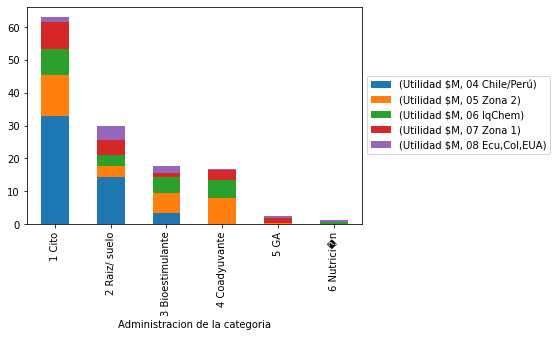

In [26]:
RCZ_noesMx = Ventas_zona_producto_cultivo_noesMx_2022.groupby(['Administracion de la categoria','Zona_Ranking']).agg({'Utilidad $M': 'sum'}).reset_index()
RCZ_noesMx_ = Ventas_zona_producto_cultivo_noesMx_2022.groupby(['Administracion de la categoria','Zona_Ranking']).agg({'Utilidad $M': 'sum'})
RCZ_noesMx_df = pd.DataFrame(RCZ_noesMx_.unstack(level = 1))
RCZ_noesMx_df.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [27]:
print ('${:,.3f} M'.format(RCZ_noesMx['Utilidad $M'].sum()) )

$130.878 M


In [28]:
Ventas_RM_noesMx_2022 = Ventas_zona_producto_cultivo_noesMx_2022.groupby(['RM/ REIQ_Ranking']).agg({'Utilidad $M': 'sum'})
Ventas_RM_noesMx_2022_sorted = Ventas_RM_noesMx_2022.sort_values(by=['Utilidad $M'],ascending=False)
Ventas_RM_noesMx_2022_sorted.head(10).style.format('${0:,.2f}').bar(color='lightgreen', vmin=0, subset=['Utilidad $M'])

,Utilidad $M
RM/ REIQ_Ranking,
10 Drokasa,$19.19
09 GMT,$18.27
08 Agrícola Piscis,$14.75
12 Propios,$14.45
05 GT,$12.40
11 Empresas Melo,$11.55
18 Tattersal,$9.65
16 Txao,$7.29
19 Agrica,$3.89


In [29]:
print ('${:,.3f} M'.format(Ventas_RM_noesMx_2022['Utilidad $M'].head(10).sum()) )


$104.249 M
